<a href="https://colab.research.google.com/github/Velmurugan-02/Deepfake_Capstone_Test_ml/blob/main/Deepfake_Capstone_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"velmurugan009","key":"d20dcb18fc40bcc84a4789cde412a020"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d ciplab/real-and-fake-face-detection

Dataset URL: https://www.kaggle.com/datasets/ciplab/real-and-fake-face-detection
License(s): CC-BY-NC-SA-4.0
 97% 417M/431M [00:02<00:00, 86.7MB/s]
100% 431M/431M [00:02<00:00, 162MB/s] 


In [4]:
!unzip real-and-fake-face-detection.zip

Archive:  real-and-fake-face-detection.zip
  inflating: real_and_fake_face/training_fake/easy_100_1111.jpg  
  inflating: real_and_fake_face/training_fake/easy_101_0010.jpg  
  inflating: real_and_fake_face/training_fake/easy_102_0101.jpg  
  inflating: real_and_fake_face/training_fake/easy_103_1111.jpg  
  inflating: real_and_fake_face/training_fake/easy_104_1000.jpg  
  inflating: real_and_fake_face/training_fake/easy_105_1100.jpg  
  inflating: real_and_fake_face/training_fake/easy_106_0011.jpg  
  inflating: real_and_fake_face/training_fake/easy_107_1011.jpg  
  inflating: real_and_fake_face/training_fake/easy_108_1111.jpg  
  inflating: real_and_fake_face/training_fake/easy_109_1111.jpg  
  inflating: real_and_fake_face/training_fake/easy_10_0001.jpg  
  inflating: real_and_fake_face/training_fake/easy_110_0001.jpg  
  inflating: real_and_fake_face/training_fake/easy_111_1101.jpg  
  inflating: real_and_fake_face/training_fake/easy_112_1001.jpg  
  inflating: real_and_fake_face/tr

In [6]:
import os

# Show contents of current directory
print("Root contents:")
print(os.listdir())

Root contents:
['.config', 'real_and_fake_face_detection', 'kaggle.json', 'real_and_fake_face', 'real-and-fake-face-detection.zip', 'sample_data']


In [7]:
print("Inside real_and_fake_face_detection:")
print(os.listdir("real_and_fake_face_detection"))

Inside real_and_fake_face_detection:
['real_and_fake_face']


In [8]:
print("Full subfolders:")
print(os.listdir("real_and_fake_face_detection/real_and_fake_face"))

Full subfolders:
['training_fake', 'training_real']


In [9]:
import os

real_path = "real_and_fake_face_detection/real_and_fake_face/training_real"
fake_path = "real_and_fake_face_detection/real_and_fake_face/training_fake"

print("Number of Real Images:", len(os.listdir(real_path)))
print("Number of Fake Images:", len(os.listdir(fake_path)))

Number of Real Images: 1081
Number of Fake Images: 960


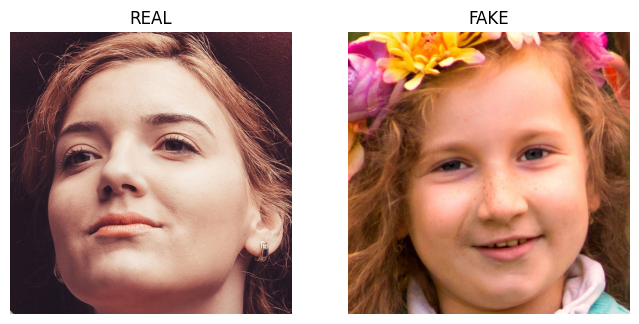

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

real_img = load_img(os.path.join(real_path, os.listdir(real_path)[0]))
fake_img = load_img(os.path.join(fake_path, os.listdir(fake_path)[0]))

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(real_img)
plt.title("REAL")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fake_img)
plt.title("FAKE")
plt.axis('off')
plt.show()

In [11]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_images_from_folder(folder, label, image_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, target_size=image_size)
        img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
        images.append(img_array)
        labels.append(label)
    return images, labels

In [12]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

def load_images_from_folder(folder, label, image_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, target_size=image_size)  # Resize to 64x64
        img_array = img_to_array(img) / 255.0  # Normalize pixels to [0, 1]
        images.append(img_array)
        labels.append(label)
    return images, labels

In [13]:
real_path = "real_and_fake_face_detection/real_and_fake_face/training_real"
fake_path = "real_and_fake_face_detection/real_and_fake_face/training_fake"

real_images, real_labels = load_images_from_folder(real_path, label=1)
fake_images, fake_labels = load_images_from_folder(fake_path, label=0)

In [14]:
X = np.array(real_images + fake_images)
y = np.array(real_labels + fake_labels)

print("Image data shape:", X.shape)
print("Label shape:", y.shape)

Image data shape: (2041, 64, 64, 3)
Label shape: (2041,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1632, 64, 64, 3)
Test set shape: (409, 64, 64, 3)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [17]:
model = Sequential()

# 1st Convolution + MaxPooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution + MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolution + MaxPooling
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Dense Layer + Dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Drop 50% neurons to reduce overfitting

# Output Layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [19]:
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(769), np.int64(1): np.int64(863)}


In [20]:
from sklearn.utils import class_weight

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)

Class Weights: {0: np.float64(1.0611183355006502), 1: np.float64(0.9455388180764774)}


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,        # random rotation up to 15 degrees
    width_shift_range=0.1,    # horizontal shift
    height_shift_range=0.1,   # vertical shift
    shear_range=0.1,          # shearing
    zoom_range=0.2,           # zoom in/out
    horizontal_flip=True,     # flip image horizontally
    fill_mode='nearest'       # fill in pixels after transformation
)

In [23]:
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=32,
    shuffle=True
)

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow(
    X_test, y_test,
    batch_size=32,
    shuffle=False
)

In [25]:
model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    class_weight=class_weights_dict
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 16s 240ms/step - accuracy: 0.4892 - loss: 0.6933 - val_accuracy: 0.4670 - val_loss: 0.6939
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 233ms/step - accuracy: 0.4841 - loss: 0.6945 - val_accuracy: 0.4670 - val_loss: 0.6935
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 233ms/step - accuracy: 0.4836 - loss: 0.6923 - val_accuracy: 0.4670 - val_loss: 0.6935
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 233ms/step - accuracy: 0.4802 - loss: 0.6931 - val_accuracy: 0.4670 - val_loss: 0.6932
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 235ms/step - accuracy: 0.4760 - loss: 0.6948 - val_accuracy: 0.5330 - val_loss: 0.6931
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 233ms/step - accuracy: 0.5002 - loss: 0.6925 - val_accuracy: 0.4670 - val_loss: 0.6933
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 233ms/step - accuracy: 0.4838 - loss: 0.6935 - val_accuracy: 0.4670 - val_loss: 0.6935
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 249ms/step - accuracy: 0.4908 - loss: 0.6940 - val_accu

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,                      # augmented training data
    validation_data=test_generator,      # untouched test data
    epochs=20,                            # max epochs
    class_weight=class_weights_dict,     # class balancing
    callbacks=[early_stop]               # early stopping
)

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 222ms/step - accuracy: 0.5400 - loss: 0.6916 - val_accuracy: 0.5330 - val_loss: 0.6929
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - accuracy: 0.5229 - loss: 0.6928 - val_accuracy: 0.4670 - val_loss: 0.6932
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 231ms/step - accuracy: 0.4746 - loss: 0.6927 - val_accuracy: 0.4670 - val_loss: 0.6932
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 232ms/step - accuracy: 0.4733 - loss: 0.6925 - val_accuracy: 0.4670 - val_loss: 0.6932


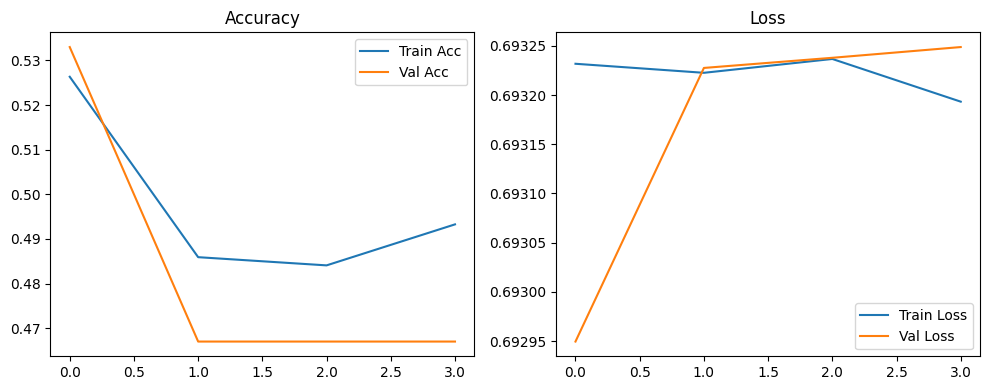

In [27]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()

In [28]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5275 - loss: 0.6930
Test Loss: 0.6929
Test Accuracy: 0.5330
